<a href="https://colab.research.google.com/github/PanosRntgs/Machine-Learning/blob/main/Clustering_Techniques_on_MNIST_Subset_PCA_Transformation_and_K_Means_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this python notebook, we work on the MNIST dataset keeping only the digits 7, 8, and 9.

We begin by applying Principal Component Analysis (PCA) to reduce the dimensionality of the data to two components, enabling visualization.

Then, we visualize the data by plotting the two components of each class. Using the transformed data, we train multiple K-Means clusterers with varying numbers of clusters (ranging from 2 to 10) and evaluate their performance using silhouette scores.

We determine the optimal number of clusters that best fit the data and examine if it aligns with the number of digits in the dataset subset.

Finally, we identify the best K-Means model, find the center of each cluster, and construct representative images for visualization.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
# Keep only the digits 7, 8, and 9
selected_labels = [7, 8, 9]
filter_mask = np.isin(y_train, selected_labels)

x_train_selected = x_train[filter_mask]
y_train_selected = y_train[filter_mask]

In [4]:
# Transform the data using principal component analysis (PCA) and keep only the first two components
x_train_flat = x_train_selected.reshape(x_train_selected.shape[0], -1)
pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train_flat)

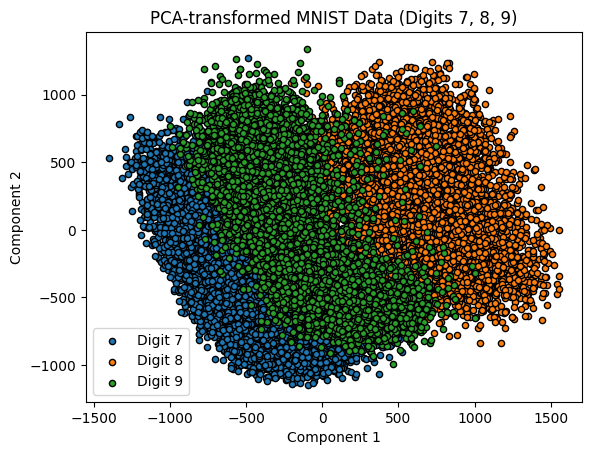

In [5]:
# Visualize the data by plotting the two components of each class
for digit in selected_labels:
    plt.scatter(x_train_pca[y_train_selected == digit, 0],
                x_train_pca[y_train_selected == digit, 1],
                label=f'Digit {digit}',edgecolor='k',
                s=20)

plt.title('PCA-transformed MNIST Data (Digits 7, 8, 9)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend()
plt.show()

In [6]:
# Initialize a list to store silhouette scores
silhouette_scores = []

Number of clusters: 2, Silhouette Score: 0.37182782844773926
Number of clusters: 3, Silhouette Score: 0.4313170606571882
Number of clusters: 4, Silhouette Score: 0.4150034795413307
Number of clusters: 5, Silhouette Score: 0.3868478765646371
Number of clusters: 6, Silhouette Score: 0.3681792737612789
Number of clusters: 7, Silhouette Score: 0.38530233649648343
Number of clusters: 8, Silhouette Score: 0.37382330989591867
Number of clusters: 9, Silhouette Score: 0.36100097055245334
Number of clusters: 10, Silhouette Score: 0.3598624745666564


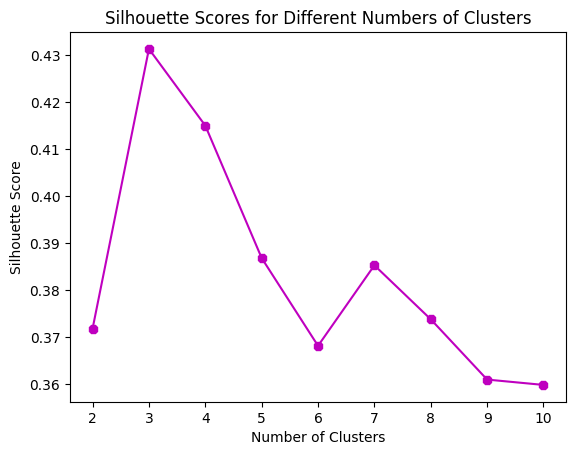

In [7]:
# Train K-Means clusterers with 2 to 10 clusters
for n_clusters in range(2, 11):
    # Create K-Means clusterer
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)

    # Fit the model to the PCA-transformed data
    labels = kmeans.fit_predict(x_train_pca)

    # Calculate silhouette score
    silhouette_avg = silhouette_score(x_train_pca, labels)
    silhouette_scores.append(silhouette_avg)

    # Print silhouette score for each number of clusters
    print(f"Number of clusters: {n_clusters}, Silhouette Score: {silhouette_avg}")

# Plot the silhouette scores
plt.plot(range(2, 11), silhouette_scores,color='m', marker='8')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


The silhouette scores shows how well-defined the clusters are. From the tested numbers of clusters (2 to 10), the highest silhouette score is for 3 clusters so its the optimal number of clusters.

The optimal number of clusters (3) agrees with the number of digits selected (Digits 7, 8, 9) . However, it's not always a perfect match, and the choice of clusters depends on various factors like our goals and data characteristics.

In [8]:
# Train the K-Means model with the optimal number of clusters
optimal_n_clusters = 3
kmeans = KMeans(n_clusters=optimal_n_clusters, n_init=10, random_state=42)
labels = kmeans.fit_predict(x_train_pca)

In [9]:
# Find the center of each cluster
cluster_centers = kmeans.cluster_centers_
print(cluster_centers)

[[-115.13945969 -544.86324196]
 [-526.32292966  372.48027931]
 [ 679.69105766  238.0756482 ]]


In [10]:
# Plot representative images for each cluster
plt.figure(figsize=(8, 4 * optimal_n_clusters))

<Figure size 800x1200 with 0 Axes>

<Figure size 800x1200 with 0 Axes>

In [11]:
# Inverse transform the cluster centers to the original feature space
cluster_centers_original_space = pca.inverse_transform(kmeans.cluster_centers_)

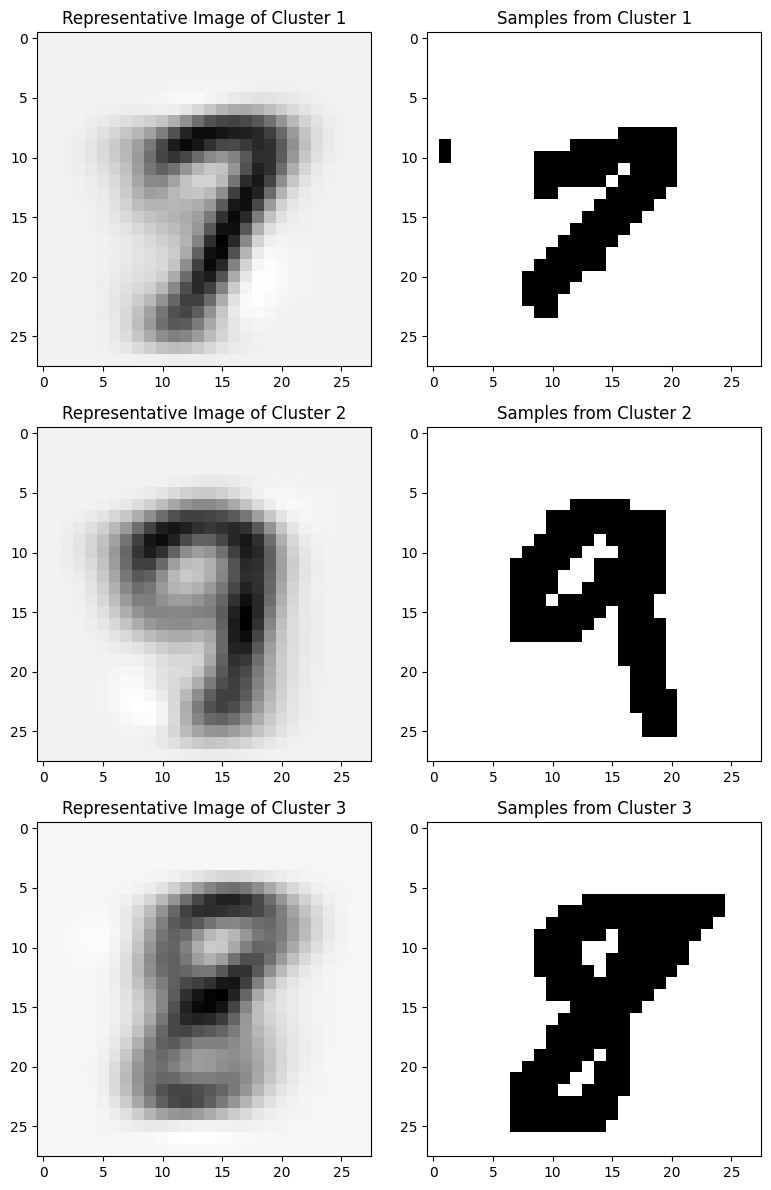

In [12]:
# Plot representative images for each cluster
plt.figure(figsize=(8, 4 * optimal_n_clusters))

for i in range(optimal_n_clusters):
    representative_image = cluster_centers_original_space[i].reshape(28, 28)
    plt.subplot(optimal_n_clusters, 2, 2 * i + 1)
    plt.imshow(representative_image, cmap='gist_yarg')
    plt.title(f'Representative Image of Cluster {i + 1}')

    plt.subplot(optimal_n_clusters, 2, 2 * i + 2)
    cluster_samples = x_train_selected[labels == i][:5]
    for sample in cluster_samples:
        plt.imshow(sample.reshape(28, 28), cmap='gist_yarg', vmin=0, vmax=1)
        plt.title(f'Samples from Cluster {i + 1}')

plt.tight_layout()
plt.show()